# Import Packages

In [1]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae

In [2]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

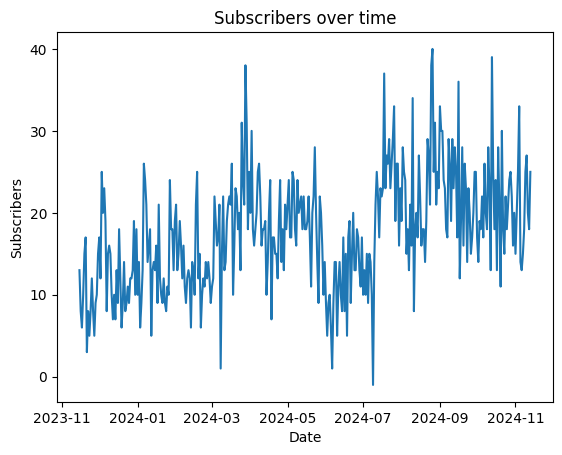

In [3]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [4]:
x_train, x_test, y_train, y_test, scaler = prepare_train_test_data(data, time_step_in=7, time_step_out=7, test_size=0.2)

x_train shape: (280, 7), y_train shape: (280, 7), x_test shape: (71, 7), y_test shape: (71, 7)


In [5]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (71, 7, 1)
X_train shape => (280, 7, 1)


# model definition

In [6]:
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(7,1)))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(7))
lstm_model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.03), metrics=['mean_absolute_error'])
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,157 (199.83 KB)

 Trainable params: 51,157 (199.83 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history=lstm_model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1,
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.6139 - mean_absolute_error: 0.6139 - val_loss: 0.1747 - val_mean_absolute_error: 0.1747
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - val_loss: 0.1391 - val_mean_absolute_error: 0.1391
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - val_loss: 0.1338 - val_mean_absolute_error: 0.1338
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - val_loss: 0.1285 - val_mean_absolute_error: 0.1285
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - val_loss: 0.1205 - val_mean_absolute_error: 0.1205
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - val_loss: 0.1207 - val_mean_absolute_error: 0.1207
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - val_loss: 0.121

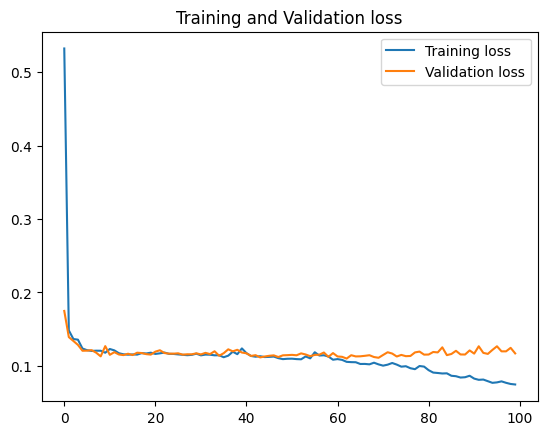

In [8]:
history_plot(history)

In [9]:
train_predicted=lstm_model.predict(x_train)
test_predicted=lstm_model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [10]:
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.07029712335281611 
MAE  Test data : 0.11688799526071063 


In [12]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    
    if len(input_window.shape) == 1:
        input_window = input_window.reshape(-1, 1)
    
    # Reshape input window to 3D for LSTM (1 sample, time_steps, features)
    y_temp = lstm_model.predict(input_window.reshape(1, input_window.shape[0], input_window.shape[1]))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0]) 
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0]  

Step 1 ==> Input Window: [[0.53658537]
 [0.625     ]
 [0.63414634]
 [0.56097561]
 [0.41463415]
 [0.53846154]
 [0.3902439 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction Output (y_temp): [[0.43284506 0.4292719  0.46683532 0.4969126  0.49416173 0.4531014
  0.46818864]]
Step 2 ==> Input Window: [[0.625     ]
 [0.63414634]
 [0.56097561]
 [0.41463415]
 [0.53846154]
 [0.3902439 ]
 [0.43284506]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction Output (y_temp): [[0.4463265  0.46502987 0.5016405  0.48255634 0.51234657 0.44517544
  0.5134794 ]]
Step 3 ==> Input Window: [[0.63414634]
 [0.56097561]
 [0.41463415]
 [0.53846154]
 [0.3902439 ]
 [0.43284506]
 [0.44632649]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction Output (y_temp): [[0.55828816 0.6074542  0.6040698  0.53094697 0.5600475  0.5475532
  0.72343886]]
Step 4 ==> Input Window: [[0.56097561]
 [0.41463415]
 [0.53846154]
 [0.3902439 ]
 [0.43284506]
 [0.44632649]
 [0.55828816]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction Output (y_

In [13]:
all_predictions=np.array(all_predictions)
all_predictions

array([0.43284506, 0.4292719 , 0.46683532, 0.4969126 , 0.49416173,
       0.4531014 , 0.46818864, 0.4463265 , 0.46502987, 0.5016405 ,
       0.48255634, 0.51234657, 0.44517544, 0.5134794 , 0.55828816,
       0.6074542 , 0.6040698 , 0.53094697, 0.5600475 , 0.5475532 ,
       0.72343886, 0.63618195, 0.5531971 , 0.6182026 , 0.5829577 ,
       0.59287983, 0.7121463 , 0.6221205 , 0.5189775 , 0.4883601 ,
       0.43242198, 0.47090036, 0.5895424 , 0.5610737 , 0.438654  ],
      dtype=float32)

In [14]:
num_samples = len(all_predictions) // 7
all_predictions_reshaped = all_predictions.reshape(num_samples, 7)
y_next_30 = scaler.inverse_transform(all_predictions_reshaped)
y_next_30=np.round(y_next_30)
print(y_next_30)

[[17. 16. 18. 19. 19. 17. 18.]
 [17. 18. 20. 19. 20. 16. 20.]
 [22. 23. 24. 21. 22. 20. 29.]
 [25. 21. 24. 23. 23. 27. 25.]
 [20. 19. 17. 18. 23. 21. 17.]]


In [19]:
x_train= x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0], -1)

print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (71, 7)
X_train shape => (280, 7)


In [20]:
x_test=scaler.inverse_transform(x_test)
x_train=scaler.inverse_transform(x_train)

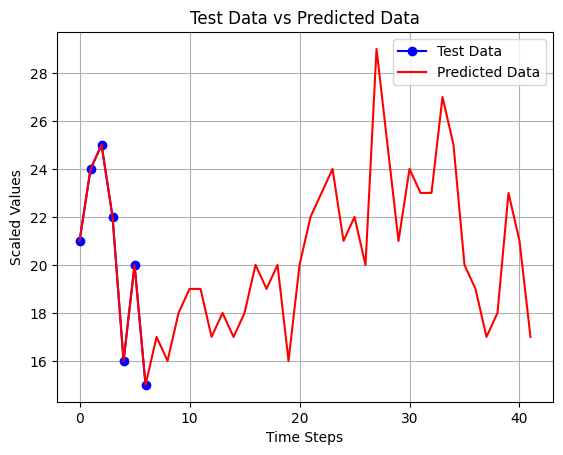

In [21]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
last_date = clean_df.index[-1]
total_sub=np.sum(clean_df["Subscribers"])
total_next_30=np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {total_next_30} => final after 30 days: {total_sub + total_next_30}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_30_days: 718.0 => final after 30 days: 7101.0


In [23]:
avg_sub = np.mean(np.array(clean_df['Subscribers']))
avg_sub * 7

122.41369863013699